# K-MEANS CLUSTERING

## Importing packages

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA

## Loading the data

In [7]:
# Load dataset
data = pd.read_csv('../data/heart_statlog_cleveland_hungary_final.csv')

# Split data into features and target
X = data.drop(columns=['MI'])  # Features
y = data['MI']  # Target

## Feature Scaling

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Visualize Clusters (Using PCA)


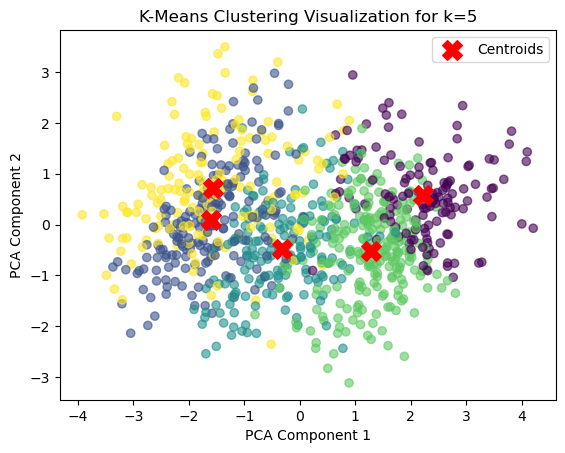

In [11]:
#trying with k=5 clusters 
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit_predict(X_scaled)

#visualise using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters using PSA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], 
            pca.transform(kmeans.cluster_centers_)[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Visualization for k=5')
plt.legend()
plt.show()

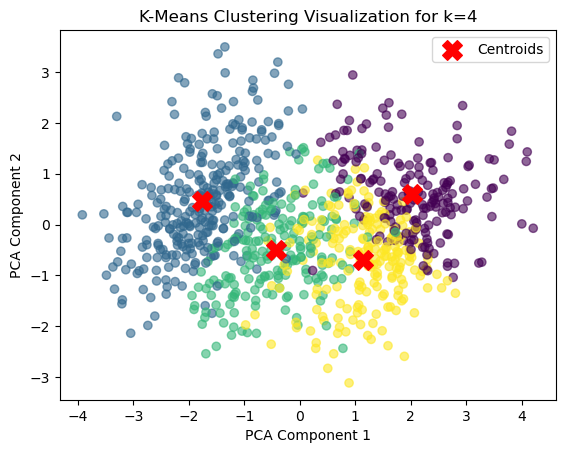

In [12]:
#trying with k=4 clusters
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit_predict(X_scaled)

#PCA - reducing dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:,0], 
            pca.transform(kmeans.cluster_centers_)[:,1], 
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Visualization for k=4')
plt.legend()
plt.show()

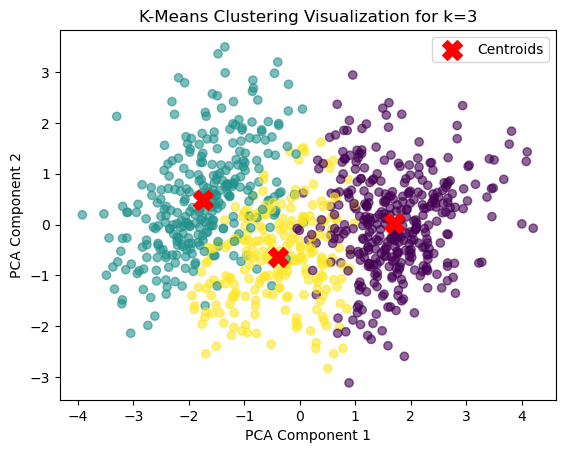

In [13]:
#trying with k=3 clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit_predict(X_scaled)

#PCA - reducing dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters using PCA
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], 
            pca.transform(kmeans.cluster_centers_)[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Visualization for k=3')
plt.legend()
plt.show()

## Determine the best value for k

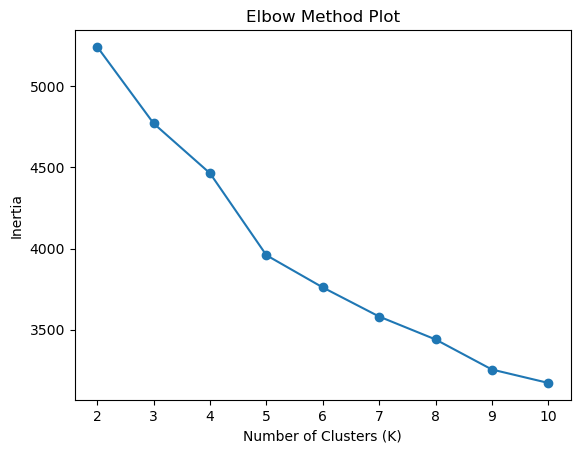

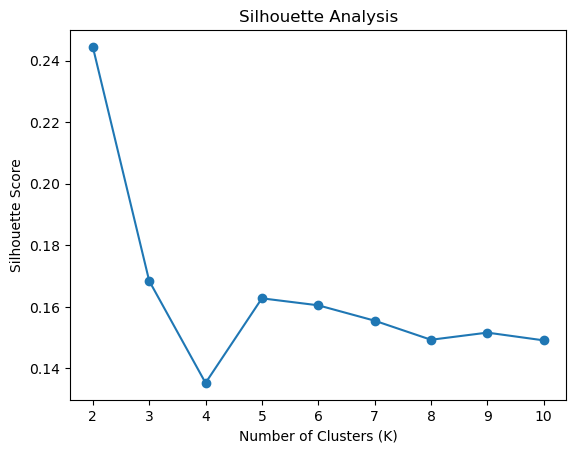

In [15]:
# creating the list of inertia for different values of k 
inertia = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting Elbow Method
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method Plot')
plt.show()
# Plot Silhouette Scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

## K-Means for the optimal k

In [17]:
# From the above plots, we choose the optimal K=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit_predict(X_scaled)

# Assigning clusters
data['cluster'] = kmeans.labels_
clusters = kmeans.labels_
print("Cluster centroids:\n", kmeans.cluster_centers_)

Cluster centroids:
 [[ 0.43789185  0.23479187  0.55461953  0.35897181 -0.6220279   0.93070736
   0.71711005  0.71659244]
 [-0.40554527 -0.55569278 -1.05593759 -0.02714876  0.70906346 -0.70379985
  -0.49564285 -0.74774524]
 [-0.15440847  0.34325261  0.48748236 -0.51113576  0.0518348  -0.52739478
  -0.46509789 -0.14676982]]


In [18]:
cluster_summary = data.groupby('cluster').mean()
print(cluster_summary)

               age       sex  chest_pain_type  resting_bp  max_heart_rate  \
cluster                                                                     
0        57.568627  0.887955         3.764706  136.787115      121.473389   
1        49.554054  0.567568         2.263514  130.668919      154.908784   
2        51.940426  0.931915         3.702128  123.000000      138.400000   

         exercise_angina   oldpeak  ST_slope        MI  
cluster                                                 
0               0.854342  1.641457  2.064426  0.893557  
1               0.054054  0.354392  1.175676  0.135135  
2               0.140426  0.386809  1.540426  0.548936  


## Check for Purity

In [20]:
# Assigning clusters to majority class in each cluster
labels = np.zeros_like(kmeans.labels_)
for i in range(kmeans.n_clusters):
    mask = (kmeans.labels_ == i)
    labels[mask] = y[mask].mode()[0]

# Calculate accuracy as purity measure
purity = accuracy_score(y, labels)
print("Cluster Purity:", purity)

Cluster Purity: 0.7927927927927928


## Cluster generation and analysis

In [22]:
#create a new dataset with new column for clusters numbered 0-3(k=4)
data.to_csv('updated_dataset_with_3_clusters.csv', index=False)
#it creates the dataset with new name in this folder

In [23]:
# Calculating the mean by grouping by the column 'cluster'
cluster_summary = data.groupby('cluster').mean()

# Display the cluster summary statistics
print("Statistics for cluster summary:")
print(cluster_summary)

Statistics for cluster summary:
               age       sex  chest_pain_type  resting_bp  max_heart_rate  \
cluster                                                                     
0        57.568627  0.887955         3.764706  136.787115      121.473389   
1        49.554054  0.567568         2.263514  130.668919      154.908784   
2        51.940426  0.931915         3.702128  123.000000      138.400000   

         exercise_angina   oldpeak  ST_slope        MI  
cluster                                                 
0               0.854342  1.641457  2.064426  0.893557  
1               0.054054  0.354392  1.175676  0.135135  
2               0.140426  0.386809  1.540426  0.548936  


MI likelihood per cluster:
cluster
0    0.893557
1    0.135135
2    0.548936
Name: MI, dtype: float64


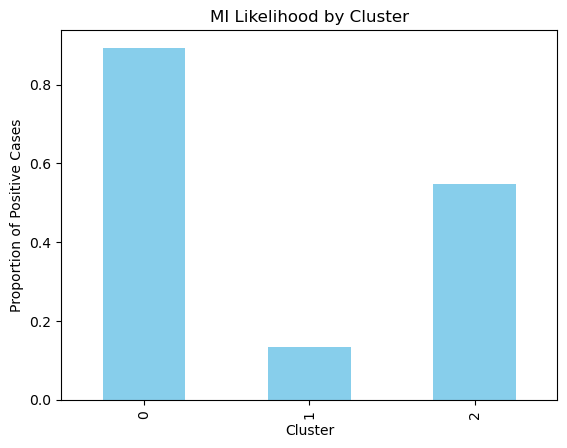

In [42]:
# To calculate disease likelihood for each cluster
disease_likelihood = data.groupby('cluster')['MI'].mean()

print("MI likelihood per cluster:")
print(disease_likelihood)

# Visualize the likelihood
disease_likelihood.plot(kind='bar', color='skyblue', title='MI Likelihood by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion of Positive Cases')
plt.show()